<a href="https://colab.research.google.com/github/Diwash17/IPL-project-/blob/main/IPLDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project done by Diwash Adhikari**





**Indian Premier League (IPL) Data Analysis**

**The Indian Premier League (IPL) is a men's Twenty20 (T20) cricket league held annually in India. Founded by the BCCI in 2007, the league features ten city-based franchise teams. The IPL usually takes place during the summer, between March and May each year. It has an exclusive window in the ICC Future Tours Programme, resulting in fewer international cricket tours occurring during the IPL seasons.The IPL is the most popular cricket league in the world.**

Feature in the dataset are


*   city
*   date
*   player_of_match
*   venue
*   neutral_venue
*   team1 (team1 is home team except in neutral_venue games)
*   team2 ( team 2 is away team except in neutral_venue games)
*   toss_winner team who won the toss and decides whether to bat or field
*   toss_decision 2 decision(bat & field)
*  result match won by run or wicket
*   result_margin (margin is given in both run and wicket so for example of 8 in result_margin first see result if run than it means won by 8 run similarly if wicket in result column and 8 in this column it means won by wicket)
*   eliminator (in this dataset no eliminator match 'Y'yes is shown in all match its showing 'N' no which i wrong because here all matches are included even knockout so i have remove this column)
*  method (more than 75 value are missing because less matches are decided by dls so i removed this column also)
*   umpire1
*   umpire2

 Target in dataset is

*   result winning team name  any method(even dls and superover in case of match tied)































 **This dataset of IPL Matches from 2008 to 2020 does not include individual player and bowl-by-bowl data.**



 **[Importing Modules]**

In [560]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px




**Reading CSV file**

In [561]:
df=pd.read_csv('/content/IPL Matches 2008-2020.csv')

In [562]:
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


Data exploration

In [563]:
df.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [564]:
df.shape

(816, 17)

In [565]:
df.dtypes

id                   int64
city                object
date                object
player_of_match     object
venue               object
neutral_venue        int64
team1               object
team2               object
toss_winner         object
toss_decision       object
winner              object
result              object
result_margin      float64
eliminator          object
method              object
umpire1             object
umpire2             object
dtype: object

In [566]:
df['date'] = pd.to_datetime(df['date'])

In [567]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               816 non-null    int64         
 1   city             803 non-null    object        
 2   date             816 non-null    datetime64[ns]
 3   player_of_match  812 non-null    object        
 4   venue            816 non-null    object        
 5   neutral_venue    816 non-null    int64         
 6   team1            816 non-null    object        
 7   team2            816 non-null    object        
 8   toss_winner      816 non-null    object        
 9   toss_decision    816 non-null    object        
 10  winner           812 non-null    object        
 11  result           812 non-null    object        
 12  result_margin    799 non-null    float64       
 13  eliminator       812 non-null    object        
 14  method           19 non-null     object   

**Checking null values for data cleaning**

In [568]:
df.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

more than 75% of value are missing so i drop the method column

In [569]:
df.drop(["method"],axis=1,inplace=True)

In [570]:
df.isnull().sum()

id                  0
city               13
date                0
player_of_match     4
venue               0
neutral_venue       0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              4
result              4
result_margin      17
eliminator          4
umpire1             0
umpire2             0
dtype: int64

In [571]:
df.dropna(inplace=True)

In [572]:
df.drop(["id"],axis=1,inplace=True)

In [573]:
df.isnull().sum()

city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
umpire1            0
umpire2            0
dtype: int64

Panda profiling for getting idea of data set

In [574]:
#from ydata_profiling import ProfileReport
#prof = ProfileReport(df)
#prof.to_file(output_file='Report.html')

In [575]:
df.describe()

,date,neutral_venue,result_margin
count,786,786.000000,786.000000
mean,2014-03-29 04:18:19.236641280,0.078880,17.418575
min,2008-04-18 00:00:00,0.000000,1.000000
25%,2011-04-22 06:00:00,0.000000,6.000000
50%,2013-11-04 12:00:00,0.000000,8.000000
75%,2017-04-30 00:00:00,0.000000,20.000000
max,2020-11-10 00:00:00,1.000000,146.000000
std,NaN,0.269724,22.120149


there was minor mistake in given dataset Rising Pune Supergiant and Rising Pune Supergiants are same team show i have replace

In [576]:
team_names = df[['team1','team2','toss_winner','winner']]

temp = df.replace({"Rising Pune Supergiant":"Rising Pune Supergiants"},inplace=True)


From 2019 season Delhi Daredevils changed their named to delhi capitals so i replaced with delhi capitals.

In [577]:
team_names = df[['team1','team2','toss_winner','winner']]

temp = df.replace({"Delhi Daredevils":"Delhi Capitals"},inplace=True)

Showing total number of Cities where IPL matches were played

In [578]:
df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Rajkot', 'Kanpur', 'Bengaluru', 'Sharjah', 'Dubai'],
      dtype=object)

In [579]:
df['city'].value_counts()[:10]

city
Mumbai        100
Kolkata        77
Delhi          72
Hyderabad      63
Bangalore      62
Chandigarh     56
Chennai        56
Jaipur         47
Pune           38
Abu Dhabi      27
Name: count, dtype: int64

 Showing name of venues where all IPl matches were played upto 2020

In [580]:
df['venue'].value_counts()[:]


venue
Eden Gardens                                            77
Feroz Shah Kotla                                        72
Wankhede Stadium                                        72
Rajiv Gandhi International Stadium, Uppal               63
M Chinnaswamy Stadium                                   62
MA Chidambaram Stadium, Chepauk                         56
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Sheikh Zayed Stadium                                    27
Dubai International Cricket Stadium                     23
Punjab Cricket Association IS Bindra Stadium, Mohali    21
Maharashtra Cricket Association Stadium                 21
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
M.Chinnaswamy Stadium                                   14
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadiu

All IPL Teams playing IPl upto 2020 edition

In [581]:
df['team1' and 'team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers',
       'Kings XI Punjab', 'Delhi Capitals', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions'], dtype=object)

In total 13 team have participated in different different season of ipl from 2008 to 2020

In [582]:
len(df['team1' and 'team2'].unique())

13

In [583]:
df['umpire1'].value_counts()[:10]

umpire1
HDPK Dharmasena          75
AK Chaudhary             52
Asad Rauf                51
S Ravi                   37
M Erasmus                36
BF Bowden                34
BR Doctrove              34
CB Gaffaney              34
KN Ananthapadmanabhan    33
Aleem Dar                32
Name: count, dtype: int64

In [584]:
df['umpire2'].value_counts()[:10]

umpire2
S Ravi           76
C Shamshuddin    60
SJA Taufel       54
CK Nandan        49
RJ Tucker        40
Nitin Menon      35
BNJ Oxenford     32
RB Tiffin        30
AK Chaudhary     29
SK Tarapore      26
Name: count, dtype: int64

In [585]:
df['umpire1'].unique()

array(['Asad Rauf', 'MR Benson', 'Aleem Dar', 'SJ Davis', 'BF Bowden',
       'IL Howell', 'DJ Harper', 'RE Koertzen', 'BR Doctrove',
       'AV Jayaprakash', 'BG Jerling', 'M Erasmus', 'HDPK Dharmasena',
       'S Asnani', 'GAV Baxter', 'SS Hazare', 'K Hariharan', 'SL Shastri',
       'SK Tarapore', 'S Ravi', 'SJA Taufel', 'S Das', 'AM Saheba',
       'PR Reiffel', 'JD Cloete', 'AK Chaudhary', 'VA Kulkarni',
       'BNJ Oxenford', 'CK Nandan', 'C Shamshuddin', 'NJ Llong',
       'RK Illingworth', 'RM Deshpande', 'K Srinath', 'SD Fry',
       'CB Gaffaney', 'PG Pathak', 'Nitin Menon', 'K Bharatan',
       'AY Dandekar', 'KN Ananthapadmanabhan', 'A Nand Kishore',
       'A Deshmukh', 'YC Barde', 'RJ Tucker', 'VK Sharma', 'UV Gandhe',
       'IJ Gould'], dtype=object)

In [586]:
df['umpire2'].unique()

array(['RE Koertzen', 'SL Shastri', 'GA Pratapkumar', 'DJ Harper',
       'K Hariharan', 'RB Tiffin', 'AM Saheba', 'MR Benson', 'IL Howell',
       'AV Jayaprakash', 'I Shivram', 'BR Doctrove', 'BG Jerling',
       'SJ Davis', 'SD Ranade', 'SJA Taufel', 'TH Wijewardene',
       'SK Tarapore', 'S Ravi', 'M Erasmus', 'HDPK Dharmasena',
       'SS Hazare', 'PR Reiffel', 'AL Hill', 'RJ Tucker', 'VA Kulkarni',
       'JD Cloete', 'BNJ Oxenford', 'S Asnani', 'S Das', 'C Shamshuddin',
       'AK Chaudhary', 'K Srinath', 'Subroto Das', 'CK Nandan',
       'NJ Llong', 'RK Illingworth', 'PG Pathak', 'CB Gaffaney',
       'K Srinivasan', 'SD Fry', 'VK Sharma', 'A Nand Kishore',
       'Nitin Menon', 'A Deshmukh', 'YC Barde', 'IJ Gould'], dtype=object)

In [587]:
df['player_of_match'].value_counts()[:10]

player_of_match
AB de Villiers    22
CH Gayle          22
RG Sharma         18
MS Dhoni          17
DA Warner         17
SR Watson         16
YK Pathan         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: count, dtype: int64

In [588]:
df['toss_decision'].value_counts()

toss_decision
field    477
bat      309
Name: count, dtype: int64

In [589]:
df['result'].value_counts()

result
wickets    427
runs       359
Name: count, dtype: int64

In [590]:
df['neutral_venue'].value_counts()

neutral_venue
0    724
1     62
Name: count, dtype: int64

Data Visualisation using Matplotlib and seaborn

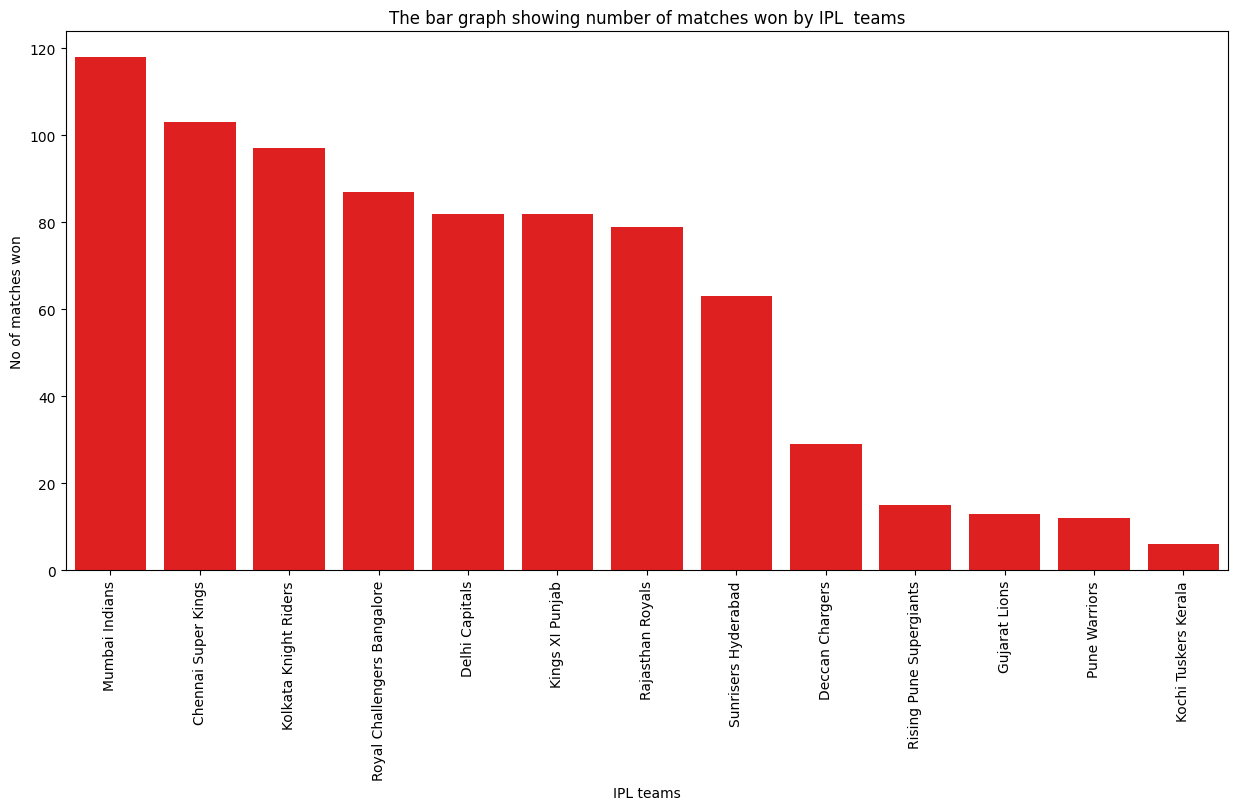

In [591]:
plt.figure(figsize=(15, 7))
sns.barplot(x=df['winner'].value_counts().index, y=df['winner'].value_counts(),color="red")
plt.xticks(rotation=90)
plt.title("The bar graph showing number of matches won by IPL  teams")
plt.xlabel("IPL teams")
plt.ylabel("No of matches won")
plt.show()


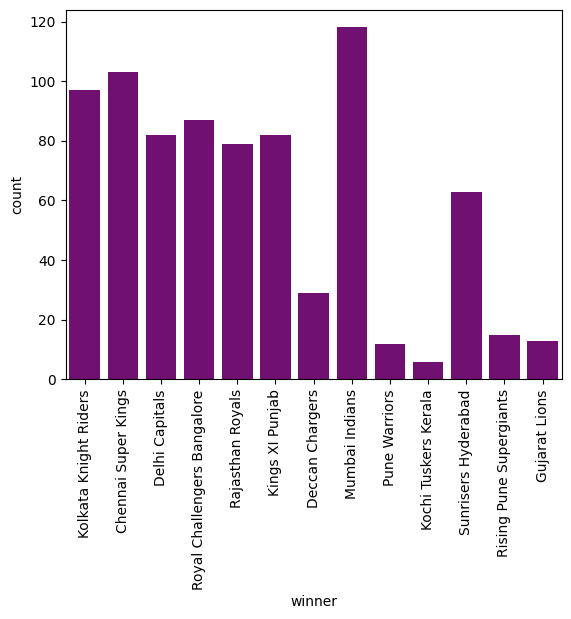

In [592]:
sns.countplot( x= 'winner' ,data=df, linewidth=2, color="purple")
plt.xticks(rotation=90)
plt.show()

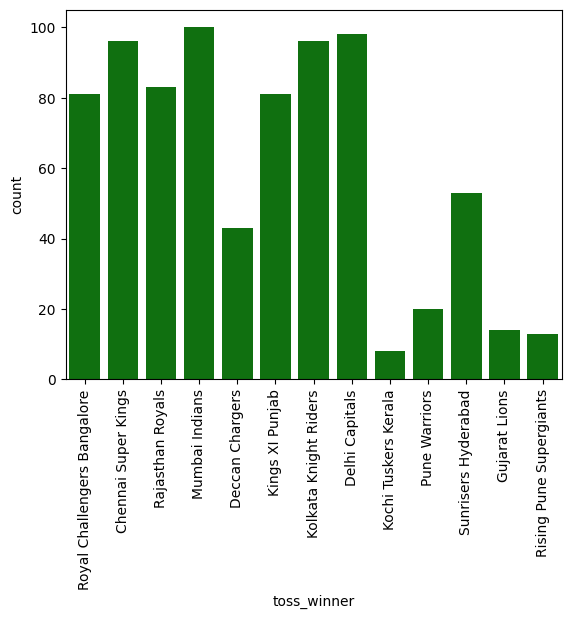

In [593]:
sns.countplot( x= 'toss_winner' ,data=df, linewidth=3 ,color="green")
plt.xticks(rotation=90)
plt.show()

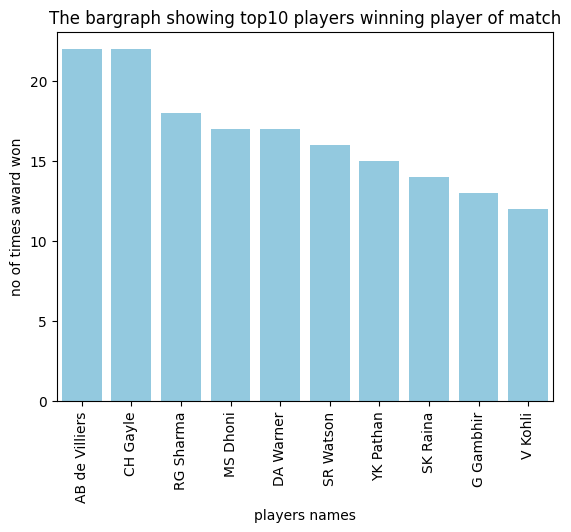

In [594]:
sns.barplot(x=df['player_of_match'].value_counts()[:10].index, y=df['player_of_match'].value_counts()[:10], color="skyblue")
plt.xticks(rotation=90)
plt.title("The bargraph showing top10 players winning player of match")
plt.ylabel("no of times award won")
plt.xlabel("players names")
plt.show()


In [595]:
print(len(df['player_of_match'].unique()))


232


232 different player have won Man of the match in IPl upto 2020 and ABD Villiers has won 22 times

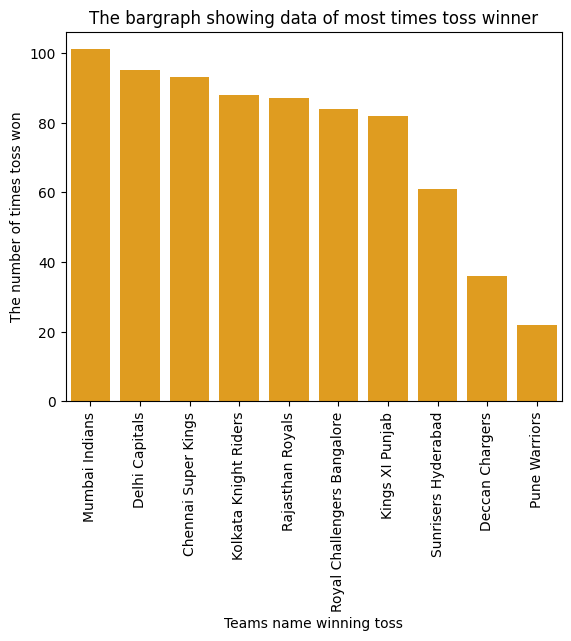

In [596]:
sns.barplot(x=df['toss_winner'].value_counts()[:10].index, y=df['team1' and 'team2'].value_counts()[:10],color="orange")
plt.xticks(rotation=90)
plt.title("The bargraph showing data of most times toss winner")
plt.ylabel("The number of times toss won")
plt.xlabel("Teams name winning toss")
plt.show()

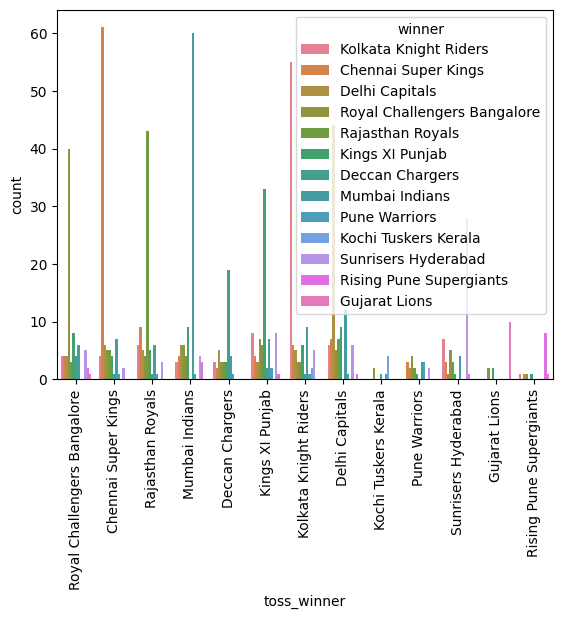

In [597]:
sns.countplot(x= 'toss_winner' , hue= 'winner' ,data=df, linewidth=0.5)
plt.xticks(rotation=90)
plt.show()

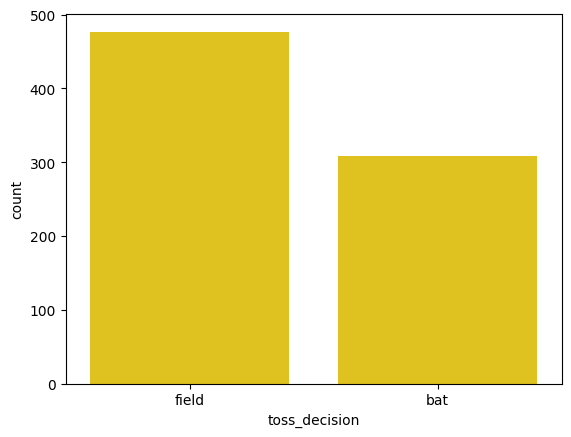

In [598]:
sns.countplot( x= 'toss_decision' ,data=df, linewidth=2,color='gold')
plt.show()

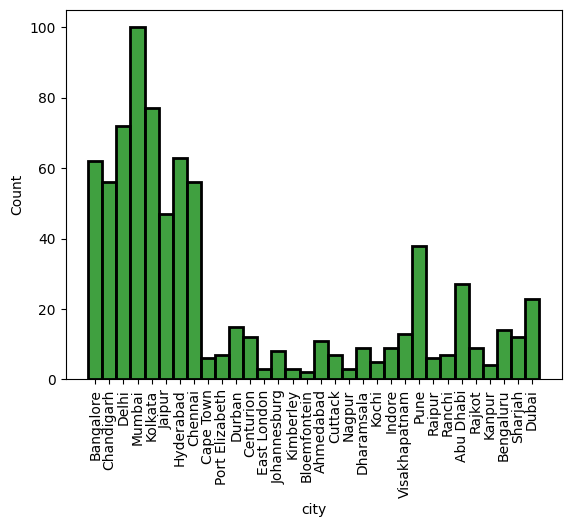

In [599]:
sns.histplot( x= 'city' ,data=df, linewidth=2,color='green')
plt.xticks(rotation=90)
plt.show()

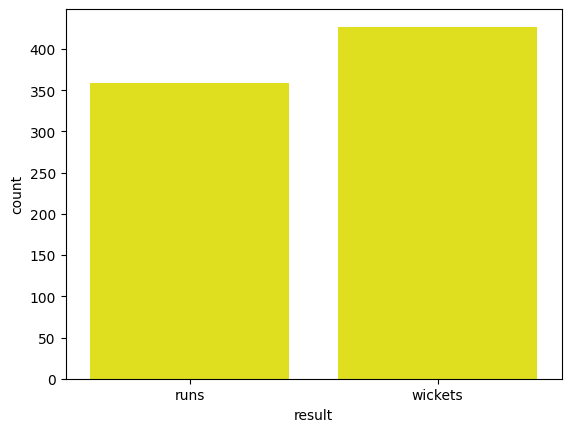

In [600]:
sns.countplot( x= 'result' ,data=df, linewidth=2,color='yellow')
plt.show()

<Axes: xlabel='toss_winner', ylabel='winner'>

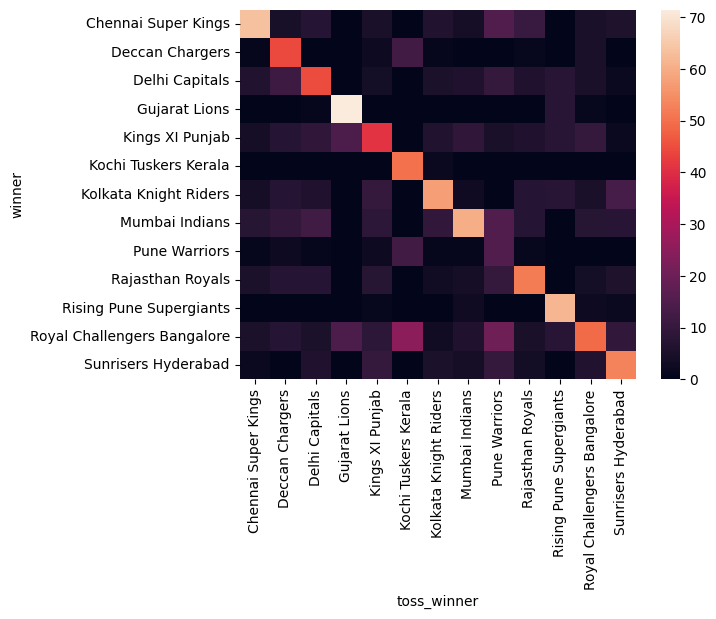

In [601]:
sns.heatmap(pd.crosstab(df["winner"],df["toss_winner"],normalize="columns")*100)

In [602]:
px.pie(df,'result')

Text(0.5, 1.0, 'Venues of IPL matches')

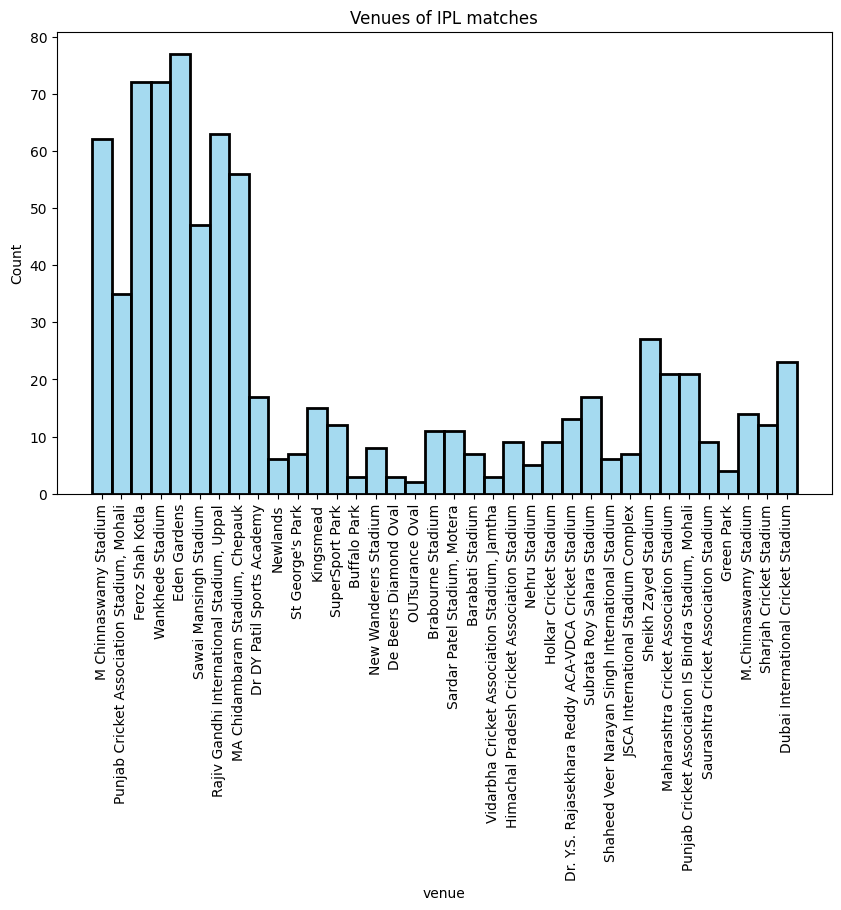

In [603]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
sns.histplot(df['venue'],linewidth=2,color="skyblue")
plt.title("Venues of IPL matches")


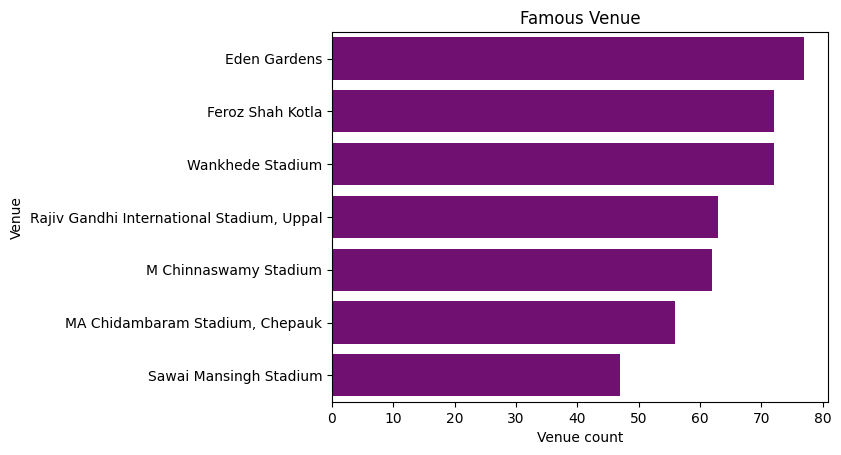

In [604]:
top_venues = df['venue'].value_counts().head(7)


top_venues_df = pd.DataFrame({'Venue': top_venues.index, 'Count': top_venues.values})

sns.barplot(x='Count', y='Venue', data=top_venues_df,color='purple')
plt.title("Famous Venue")
plt.xlabel('Venue count')
plt.ylabel('Venue')
plt.show()

<Axes: xlabel='winner', ylabel='Count'>

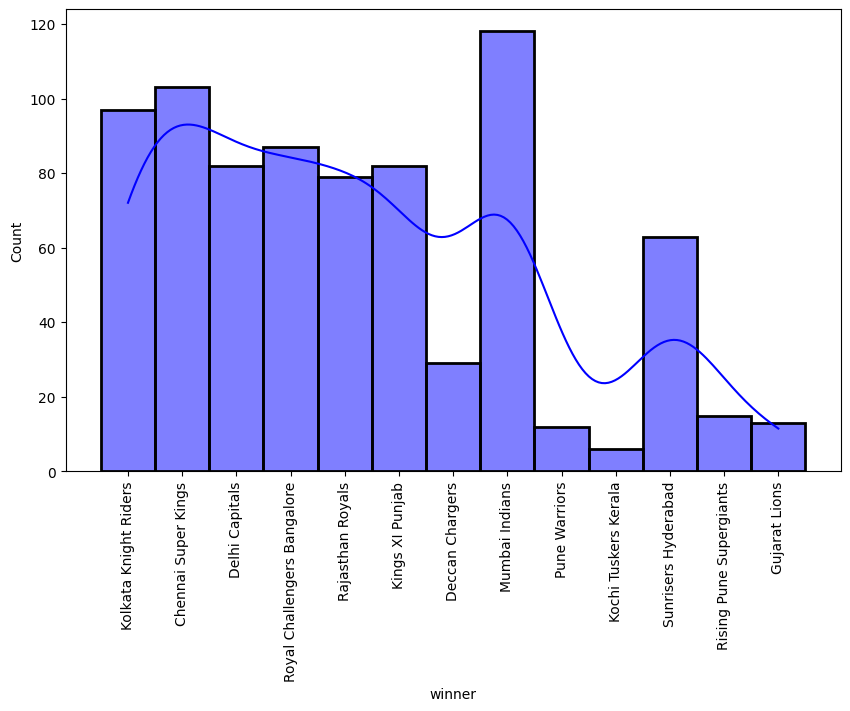

In [605]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
sns.histplot(df['winner'],linewidth=2,color='blue', kde = True)


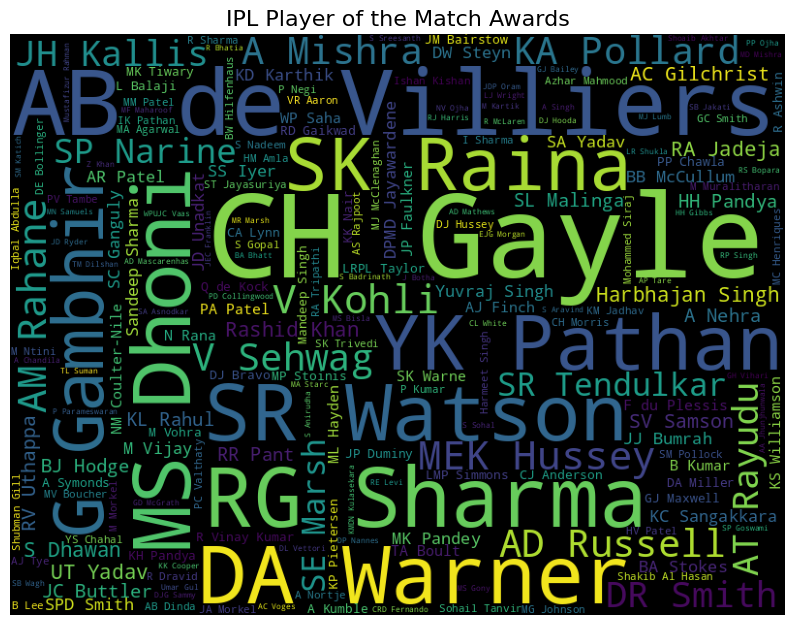

In [606]:
from collections import Counter
from wordcloud import WordCloud

player_counts = Counter(df['player_of_match'])


wordcloud = WordCloud(background_color="black", width=800, height=600).generate_from_frequencies(player_counts)


plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("IPL Player of the Match Awards", fontsize=16)
plt.savefig('wordcloud.jpg')
plt.show()

Feature Construction

In [607]:
df["detail_venue"]= df['venue'] +  "," + df['city']

In [608]:
df.head(10)

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,detail_venue
0,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,"M Chinnaswamy Stadium,Bangalore"
1,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri,"Punjab Cricket Association Stadium, Mohali,Cha..."
2,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,N,Aleem Dar,GA Pratapkumar,"Feroz Shah Kotla,Delhi"
3,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper,"Wankhede Stadium,Mumbai"
4,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan,"Eden Gardens,Kolkata"
5,Jaipur,2008-04-21,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,N,Aleem Dar,RB Tiffin,"Sawai Mansingh Stadium,Jaipur"
6,Hyderabad,2008-04-22,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Delhi Capitals,Deccan Chargers,bat,Delhi Capitals,wickets,9.0,N,IL Howell,AM Saheba,"Rajiv Gandhi International Stadium, Uppal,Hyde..."
7,Chennai,2008-04-23,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,DJ Harper,GA Pratapkumar,"MA Chidambaram Stadium, Chepauk,Chennai"
8,Hyderabad,2008-04-24,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,N,Asad Rauf,MR Benson,"Rajiv Gandhi International Stadium, Uppal,Hyde..."
9,Chandigarh,2008-04-25,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,N,Aleem Dar,AM Saheba,"Punjab Cricket Association Stadium, Mohali,Cha..."


First match of IPl was held in 2008-04-18


In [609]:
df['date'].min()

Timestamp('2008-04-18 00:00:00')

In [610]:
df['date'].max()

Timestamp('2020-11-10 00:00:00')

neutral venue  games finding insights

In [611]:
len(df[df["neutral_venue"]==1])

62

In [612]:
df[df["neutral_venue"]==1].head(31)

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,detail_venue
58,Cape Town,2009-04-18,SR Tendulkar,Newlands,1,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,field,Mumbai Indians,runs,19.0,N,BR Doctrove,K Hariharan,"Newlands,Cape Town"
59,Cape Town,2009-04-18,R Dravid,Newlands,1,Royal Challengers Bangalore,Rajasthan Royals,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,runs,75.0,N,BR Doctrove,RB Tiffin,"Newlands,Cape Town"
60,Cape Town,2009-04-19,DL Vettori,Newlands,1,Delhi Capitals,Kings XI Punjab,Delhi Capitals,field,Delhi Capitals,wickets,10.0,N,MR Benson,SD Ranade,"Newlands,Cape Town"
61,Cape Town,2009-04-19,RP Singh,Newlands,1,Deccan Chargers,Kolkata Knight Riders,Kolkata Knight Riders,bat,Deccan Chargers,wickets,8.0,N,MR Benson,BR Doctrove,"Newlands,Cape Town"
62,Port Elizabeth,2009-04-20,M Muralitharan,St George's Park,1,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,92.0,N,BG Jerling,SJA Taufel,"St George's Park,Port Elizabeth"
63,Durban,2009-04-21,CH Gayle,Kingsmead,1,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,runs,11.0,N,DJ Harper,SD Ranade,"Kingsmead,Durban"
64,Cape Town,2009-04-22,AC Gilchrist,Newlands,1,Royal Challengers Bangalore,Deccan Chargers,Deccan Chargers,bat,Deccan Chargers,runs,24.0,N,M Erasmus,AM Saheba,"Newlands,Cape Town"
65,Durban,2009-04-23,AB de Villiers,Kingsmead,1,Chennai Super Kings,Delhi Capitals,Delhi Capitals,bat,Delhi Capitals,runs,9.0,N,BR Doctrove,SJA Taufel,"Kingsmead,Durban"
67,Durban,2009-04-24,RS Bopara,Kingsmead,1,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,Kings XI Punjab,wickets,7.0,N,BR Doctrove,TH Wijewardene,"Kingsmead,Durban"
68,Durban,2009-04-25,PP Ojha,Kingsmead,1,Deccan Chargers,Mumbai Indians,Deccan Chargers,bat,Deccan Chargers,runs,12.0,N,HDPK Dharmasena,SJA Taufel,"Kingsmead,Durban"


In total 62 matches were held in neutral venue from 2008 to 2020 season.

In [613]:
df[df["neutral_venue"]==1].tail(31)

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,detail_venue
90,East London,2009-05-08,A Nehra,Buffalo Park,1,Delhi Capitals,Mumbai Indians,Mumbai Indians,bat,Delhi Capitals,wickets,7.0,N,M Erasmus,SK Tarapore,"Buffalo Park,East London"
91,Kimberley,2009-05-09,DPMD Jayawardene,De Beers Diamond Oval,1,Deccan Chargers,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,3.0,N,GAV Baxter,AM Saheba,"De Beers Diamond Oval,Kimberley"
92,Kimberley,2009-05-09,S Badrinath,De Beers Diamond Oval,1,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,bat,Chennai Super Kings,wickets,7.0,N,GAV Baxter,HDPK Dharmasena,"De Beers Diamond Oval,Kimberley"
93,Port Elizabeth,2009-05-10,JP Duminy,St George's Park,1,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,16.0,N,BR Doctrove,BG Jerling,"St George's Park,Port Elizabeth"
94,Johannesburg,2009-05-10,A Mishra,New Wanderers Stadium,1,Delhi Capitals,Kolkata Knight Riders,Delhi Capitals,field,Delhi Capitals,wickets,7.0,N,SL Shastri,RB Tiffin,"New Wanderers Stadium,Johannesburg"
95,Kimberley,2009-05-11,DR Smith,De Beers Diamond Oval,1,Deccan Chargers,Rajasthan Royals,Deccan Chargers,bat,Deccan Chargers,runs,53.0,N,GAV Baxter,HDPK Dharmasena,"De Beers Diamond Oval,Kimberley"
96,Centurion,2009-05-12,LRPL Taylor,SuperSport Park,1,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,6.0,N,M Erasmus,SS Hazare,"SuperSport Park,Centurion"
97,Centurion,2009-05-12,Harbhajan Singh,SuperSport Park,1,Kings XI Punjab,Mumbai Indians,Kings XI Punjab,bat,Mumbai Indians,wickets,8.0,N,SS Hazare,RE Koertzen,"SuperSport Park,Centurion"
98,Durban,2009-05-13,R Bhatia,Kingsmead,1,Deccan Chargers,Delhi Capitals,Deccan Chargers,field,Delhi Capitals,runs,12.0,N,DJ Harper,SL Shastri,"Kingsmead,Durban"
99,Durban,2009-05-14,LRPL Taylor,Kingsmead,1,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,bat,Royal Challengers Bangalore,wickets,2.0,N,BR Doctrove,DJ Harper,"Kingsmead,Durban"


all matches of  (2 seasons) of the ipl matches were held in 2009 in South Africa in neutral venues and 6 matches were also held in  neutral venue in 2014 in dubai abudhabi city

In [614]:
len(df[(df["neutral_venue"] == 1) & (df['city'] == 'Abu Dhabi')])

6

In [615]:
df[(df["neutral_venue"] == 1) & (df['city'] == 'Abu Dhabi')]

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,detail_venue
398,Abu Dhabi,2014-04-16,JH Kallis,Sheikh Zayed Stadium,1,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,bat,Kolkata Knight Riders,runs,41.0,N,M Erasmus,RK Illingworth,"Sheikh Zayed Stadium,Abu Dhabi"
400,Abu Dhabi,2014-04-18,GJ Maxwell,Sheikh Zayed Stadium,1,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,Kings XI Punjab,wickets,6.0,N,RK Illingworth,C Shamshuddin,"Sheikh Zayed Stadium,Abu Dhabi"
401,Abu Dhabi,2014-04-18,AM Rahane,Sheikh Zayed Stadium,1,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,N,BF Bowden,RK Illingworth,"Sheikh Zayed Stadium,Abu Dhabi"
405,Abu Dhabi,2014-04-21,SK Raina,Sheikh Zayed Stadium,1,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,Chennai Super Kings,runs,93.0,N,RK Illingworth,C Shamshuddin,"Sheikh Zayed Stadium,Abu Dhabi"
411,Abu Dhabi,2014-04-26,PV Tambe,Sheikh Zayed Stadium,1,Rajasthan Royals,Royal Challengers Bangalore,Rajasthan Royals,field,Rajasthan Royals,wickets,6.0,N,HDPK Dharmasena,C Shamshuddin,"Sheikh Zayed Stadium,Abu Dhabi"
412,Abu Dhabi,2014-04-26,Sandeep Sharma,Sheikh Zayed Stadium,1,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders,field,Kings XI Punjab,runs,23.0,N,HDPK Dharmasena,RK Illingworth,"Sheikh Zayed Stadium,Abu Dhabi"


Here is error in dataset no matches are not eliminator are provide with Y

In [616]:
len(df[df['eliminator']=='N'])

786

In [617]:
df['eliminator'].unique()

array(['N'], dtype=object)

In [618]:
df.drop(['eliminator'],axis=1,inplace=True)

In [619]:
df.sample()

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,umpire1,umpire2,detail_venue
583,Mumbai,2017-04-09,N Rana,Wankhede Stadium,0,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,Mumbai Indians,wickets,4.0,Nitin Menon,CK Nandan,"Wankhede Stadium,Mumbai"


Data and time exploration

In [620]:
df['season'] =df['date'].dt.year

In [621]:
df['month']= df['date'].dt.month_name()

In [622]:
df.sample(5)

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,umpire1,umpire2,detail_venue,season,month
340,Chandigarh,2013-04-16,MS Gony,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kings XI Punjab,runs,4.0,CK Nandan,SJA Taufel,"Punjab Cricket Association Stadium, Mohali,Cha...",2013,April
385,Ranchi,2013-05-15,MK Pandey,JSCA International Stadium Complex,0,Kolkata Knight Riders,Pune Warriors,Kolkata Knight Riders,field,Pune Warriors,runs,7.0,NJ Llong,K Srinath,"JSCA International Stadium Complex,Ranchi",2013,May
198,Kolkata,2011-04-22,CH Gayle,Eden Gardens,0,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,9.0,SS Hazare,RB Tiffin,"Eden Gardens,Kolkata",2011,April
433,Hyderabad,2014-05-12,AT Rayudu,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Mumbai Indians,Sunrisers Hyderabad,bat,Mumbai Indians,wickets,7.0,HDPK Dharmasena,VA Kulkarni,"Rajiv Gandhi International Stadium, Uppal,Hyde...",2014,May
252,Bangalore,2012-04-07,AB de Villiers,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Capitals,Delhi Capitals,field,Royal Challengers Bangalore,runs,20.0,S Asnani,S Ravi,"M Chinnaswamy Stadium,Bangalore",2012,April


Text(0, 0.5, 'no of matches played')

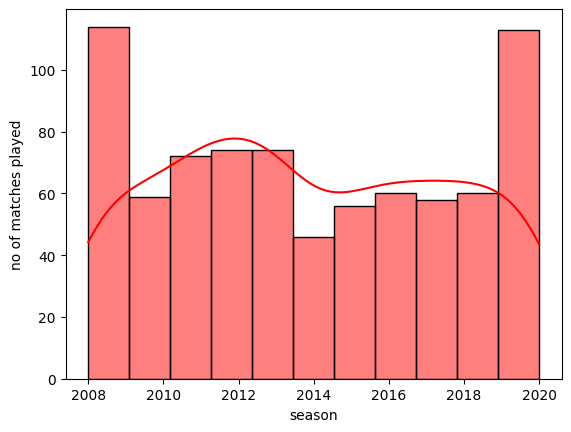

In [623]:
sns.histplot(df['season'],color='red',kde=True)
plt.xlabel('season')
plt.ylabel('no of matches played')

In [624]:
len(df['season'].unique())

13

In [625]:
df['season'].min()

2008

In [626]:
df['season'].max()

2020

**from 2008 to 2020 most matches was played in 2012 and 2013 season equal no of matches were played**

In [627]:
df['season'].mode()

0    2012
1    2013
Name: season, dtype: int32

In [628]:
df['month'].mode()

0    May
Name: month, dtype: object

In [629]:
df['month'].unique()

array(['April', 'May', 'June', 'March', 'September', 'October',
       'November'], dtype=object)

In [630]:
df[(df['player_of_match']=='AB de Villiers') & (df['result']=='runs')]

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,umpire1,umpire2,detail_venue,season,month
65,Durban,2009-04-23,AB de Villiers,Kingsmead,1,Chennai Super Kings,Delhi Capitals,Delhi Capitals,bat,Delhi Capitals,runs,9.0,BR Doctrove,SJA Taufel,"Kingsmead,Durban",2009,April
105,Bloemfontein,2009-05-17,AB de Villiers,OUTsurance Oval,1,Delhi Capitals,Rajasthan Royals,Delhi Capitals,bat,Delhi Capitals,runs,14.0,SS Hazare,IL Howell,"OUTsurance Oval,Bloemfontein",2009,May
252,Bangalore,2012-04-07,AB de Villiers,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Capitals,Delhi Capitals,field,Royal Challengers Bangalore,runs,20.0,S Asnani,S Ravi,"M Chinnaswamy Stadium,Bangalore",2012,April
278,Jaipur,2012-04-23,AB de Villiers,Sawai Mansingh Stadium,0,Rajasthan Royals,Royal Challengers Bangalore,Rajasthan Royals,field,Royal Challengers Bangalore,runs,46.0,Asad Rauf,S Asnani,"Sawai Mansingh Stadium,Jaipur",2012,April
366,Pune,2013-05-02,AB de Villiers,Subrata Roy Sahara Stadium,0,Pune Warriors,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,runs,17.0,Aleem Dar,C Shamshuddin,"Subrata Roy Sahara Stadium,Pune",2013,May
502,Mumbai,2015-05-10,AB de Villiers,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,runs,39.0,JD Cloete,C Shamshuddin,"Wankhede Stadium,Mumbai",2015,May
514,Pune,2015-05-20,AB de Villiers,Maharashtra Cricket Association Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,runs,71.0,AK Chaudhary,C Shamshuddin,"Maharashtra Cricket Association Stadium,Pune",2015,May
520,Bangalore,2016-04-12,AB de Villiers,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Royal Challengers Bangalore,runs,45.0,HDPK Dharmasena,VK Sharma,"M Chinnaswamy Stadium,Bangalore",2016,April
532,Pune,2016-04-22,AB de Villiers,Maharashtra Cricket Association Stadium,0,Rising Pune Supergiants,Royal Challengers Bangalore,Rising Pune Supergiants,field,Royal Challengers Bangalore,runs,13.0,CB Gaffaney,VK Sharma,"Maharashtra Cricket Association Stadium,Pune",2016,April
560,Bangalore,2016-05-14,AB de Villiers,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,Royal Challengers Bangalore,runs,144.0,AY Dandekar,VK Sharma,"M Chinnaswamy Stadium,Bangalore",2016,May


In [631]:
batting_first=len(df[(df['player_of_match']=='AB de Villiers') & (df['result']=='runs')])

In [632]:
batting_first

13

Abd has won 13 player of the match award while batting first

In [633]:
batting_second=df[(df['player_of_match']=='AB de Villiers') & (df['result']=='wickets')]

In [634]:
batting_second

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,umpire1,umpire2,detail_venue,season,month
177,Kochi,2011-04-09,AB de Villiers,Nehru Stadium,0,Kochi Tuskers Kerala,Royal Challengers Bangalore,Kochi Tuskers Kerala,bat,Royal Challengers Bangalore,wickets,6.0,HDPK Dharmasena,K Hariharan,"Nehru Stadium,Kochi",2011,April
296,Bangalore,2012-05-06,AB de Villiers,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Deccan Chargers,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,5.0,HDPK Dharmasena,BNJ Oxenford,"M Chinnaswamy Stadium,Bangalore",2012,May
421,Bangalore,2014-05-04,AB de Villiers,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,4.0,HDPK Dharmasena,VA Kulkarni,"M Chinnaswamy Stadium,Bangalore",2014,May
439,Ranchi,2014-05-18,AB de Villiers,JSCA International Stadium Complex,0,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,Royal Challengers Bangalore,wickets,5.0,BNJ Oxenford,C Shamshuddin,"JSCA International Stadium Complex,Ranchi",2014,May
573,Bangalore,2016-05-24,AB de Villiers,M Chinnaswamy Stadium,0,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,4.0,AK Chaudhary,HDPK Dharmasena,"M Chinnaswamy Stadium,Bangalore",2016,May
654,Bengaluru,2018-04-21,AB de Villiers,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,6.0,CB Gaffaney,CK Nandan,"M.Chinnaswamy Stadium,Bengaluru",2018,April
680,Delhi,2018-05-12,AB de Villiers,Feroz Shah Kotla,0,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,5.0,KN Ananthapadmanabhan,HDPK Dharmasena,"Feroz Shah Kotla,Delhi",2018,May
723,Chandigarh,2019-04-13,AB de Villiers,"Punjab Cricket Association IS Bindra Stadium, ...",0,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,UV Gandhe,S Ravi,"Punjab Cricket Association IS Bindra Stadium, ...",2019,April
786,Dubai,2020-10-17,AB de Villiers,Dubai International Cricket Stadium,0,Rajasthan Royals,Royal Challengers Bangalore,Rajasthan Royals,bat,Royal Challengers Bangalore,wickets,7.0,AK Chaudhary,Nitin Menon,"Dubai International Cricket Stadium,Dubai",2020,October


In [635]:
len(df[(df['player_of_match']=='AB de Villiers') & (df['result']=='wickets')])

9

In [636]:
df[(df['player_of_match']=='AB de Villiers') & (df['winner']!='Royal Challengers Bangalore')]

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,umpire1,umpire2,detail_venue,season,month
65,Durban,2009-04-23,AB de Villiers,Kingsmead,1,Chennai Super Kings,Delhi Capitals,Delhi Capitals,bat,Delhi Capitals,runs,9.0,BR Doctrove,SJA Taufel,"Kingsmead,Durban",2009,April
105,Bloemfontein,2009-05-17,AB de Villiers,OUTsurance Oval,1,Delhi Capitals,Rajasthan Royals,Delhi Capitals,bat,Delhi Capitals,runs,14.0,SS Hazare,IL Howell,"OUTsurance Oval,Bloemfontein",2009,May


In [637]:
df[(df['winner']=='Royal Challengers Bangalore') & (df['venue']=='M Chinnaswamy Stadium')]


,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,umpire1,umpire2,detail_venue,season,month
51,Bangalore,2008-05-03,P Kumar,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Deccan Chargers,Deccan Chargers,field,Royal Challengers Bangalore,runs,3.0,BR Doctrove,SL Shastri,"M Chinnaswamy Stadium,Bangalore",2008,May
121,Bangalore,2010-03-16,JH Kallis,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,bat,Royal Challengers Bangalore,wickets,8.0,S Das,DJ Harper,"M Chinnaswamy Stadium,Bangalore",2010,March
124,Bangalore,2010-03-18,JH Kallis,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,10.0,K Hariharan,DJ Harper,"M Chinnaswamy Stadium,Bangalore",2010,March
132,Bangalore,2010-03-23,RV Uthappa,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,Royal Challengers Bangalore,runs,36.0,RE Koertzen,RB Tiffin,"M Chinnaswamy Stadium,Bangalore",2010,March
157,Bangalore,2010-04-10,R Vinay Kumar,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,K Hariharan,DJ Harper,"M Chinnaswamy Stadium,Bangalore",2010,April
208,Bangalore,2011-04-29,V Kohli,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,field,Royal Challengers Bangalore,runs,26.0,Aleem Dar,SS Hazare,"M Chinnaswamy Stadium,Bangalore",2011,April
220,Bangalore,2011-05-06,CH Gayle,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,Royal Challengers Bangalore,runs,85.0,Aleem Dar,RB Tiffin,"M Chinnaswamy Stadium,Bangalore",2011,May
223,Bangalore,2011-05-08,CH Gayle,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kochi Tuskers Kerala,Kochi Tuskers Kerala,bat,Royal Challengers Bangalore,wickets,9.0,Aleem Dar,SS Hazare,"M Chinnaswamy Stadium,Bangalore",2011,May
231,Bangalore,2011-05-14,CH Gayle,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,4.0,RE Koertzen,RB Tiffin,"M Chinnaswamy Stadium,Bangalore",2011,May
242,Bangalore,2011-05-22,CH Gayle,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,K Hariharan,RE Koertzen,"M Chinnaswamy Stadium,Bangalore",2011,May


In [638]:
len(df[(df['winner']=='Royal Challengers Bangalore') & (df['venue']=='M Chinnaswamy Stadium')])


28

In [639]:
len(df[(df['winner']=='Royal Challengers Bangalore') & (df['venue']!='M Chinnaswamy Stadium')])

59

In [640]:
df[(df['winner']=='Mumbai Indians') & (df['venue']=='Wankhede Stadium')]

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,umpire1,umpire2,detail_venue,season,month
36,Mumbai,2008-05-14,ST Jayasuriya,Wankhede Stadium,0,Mumbai Indians,Chennai Super Kings,Mumbai Indians,field,Mumbai Indians,wickets,9.0,BR Doctrove,AM Saheba,"Wankhede Stadium,Mumbai",2008,May
39,Mumbai,2008-05-16,SM Pollock,Wankhede Stadium,0,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,Mumbai Indians,wickets,8.0,BR Doctrove,DJ Harper,"Wankhede Stadium,Mumbai",2008,May
194,Mumbai,2011-04-20,MM Patel,Wankhede Stadium,0,Mumbai Indians,Pune Warriors,Pune Warriors,bat,Mumbai Indians,wickets,7.0,Asad Rauf,AM Saheba,"Wankhede Stadium,Mumbai",2011,April
197,Mumbai,2011-04-22,Harbhajan Singh,Wankhede Stadium,0,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,Mumbai Indians,runs,8.0,Asad Rauf,AM Saheba,"Wankhede Stadium,Mumbai",2011,April
213,Mumbai,2011-05-02,KA Pollard,Wankhede Stadium,0,Mumbai Indians,Kings XI Punjab,Kings XI Punjab,field,Mumbai Indians,runs,23.0,HDPK Dharmasena,PR Reiffel,"Wankhede Stadium,Mumbai",2011,May
222,Mumbai,2011-05-07,AT Rayudu,Wankhede Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,32.0,K Hariharan,SJA Taufel,"Wankhede Stadium,Mumbai",2011,May
245,Mumbai,2011-05-25,MM Patel,Wankhede Stadium,0,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,Mumbai Indians,wickets,4.0,Asad Rauf,SJA Taufel,"Wankhede Stadium,Mumbai",2011,May
259,Mumbai,2012-04-11,KA Pollard,Wankhede Stadium,0,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,Mumbai Indians,runs,27.0,Aleem Dar,BNJ Oxenford,"Wankhede Stadium,Mumbai",2012,April
286,Mumbai,2012-04-29,DW Steyn,Wankhede Stadium,0,Mumbai Indians,Deccan Chargers,Mumbai Indians,field,Mumbai Indians,wickets,5.0,AK Chaudhary,BNJ Oxenford,"Wankhede Stadium,Mumbai",2012,April
295,Mumbai,2012-05-06,DR Smith,Wankhede Stadium,0,Mumbai Indians,Chennai Super Kings,Mumbai Indians,field,Mumbai Indians,wickets,2.0,Asad Rauf,S Asnani,"Wankhede Stadium,Mumbai",2012,May


In [641]:
df['home_team'] = df.apply(lambda x: x['team1'] if x['neutral_venue'] == 0 else 'Neutral', axis=1)

In [642]:
df.head()

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,umpire1,umpire2,detail_venue,season,month,home_team
0,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,Asad Rauf,RE Koertzen,"M Chinnaswamy Stadium,Bangalore",2008,April,Royal Challengers Bangalore
1,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,MR Benson,SL Shastri,"Punjab Cricket Association Stadium, Mohali,Cha...",2008,April,Kings XI Punjab
2,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,Aleem Dar,GA Pratapkumar,"Feroz Shah Kotla,Delhi",2008,April,Delhi Capitals
3,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,SJ Davis,DJ Harper,"Wankhede Stadium,Mumbai",2008,April,Mumbai Indians
4,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,BF Bowden,K Hariharan,"Eden Gardens,Kolkata",2008,April,Kolkata Knight Riders


In [643]:
from sklearn.model_selection import train_test_split

In [644]:
X = df.drop(columns=['date', 'player_of_match', 'result', 'season', 'month'])
y = df['winner']


In [645]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=5)

In [646]:
categorical_cols = ['team1', 'team2', 'toss_winner', 'winner', 'venue', 'city', 'toss_decision', 'result', 'season', 'month', 'home_team']
for col in categorical_cols:
    df[col] = df[col].astype('category')

